## **PROBLEM STATEMENT**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the required libraries

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

#### Read the test data for both the travel and the survey data

In [ ]:
travel_test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Traveldata_test.csv')
survey_test_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Surveydata_test.csv")

In [ ]:
travel_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
survey_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [ ]:
travel_test_data.shape, survey_test_data.shape

((35602, 9), (35602, 16))

Both the Traveldata and the SurveyData for the test data has the the same number of unique IDs (35602), hence we can merge the two datasets on the ID

In [ ]:
test_data = pd.merge(travel_test_data,survey_test_data, on = 'ID')

### **Checking the data types of the columns for the test_data dataset**

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
num_cols = ['Age',"Travel_Distance",'Departure_Delay_in_Mins',"Arrival_Delay_in_Mins"]
cat_cols = ["Type_Travel", "Customer_Type", "Arrival_Time_Convenient", "Catering","Onboard_Service",'Baggage_Handling', "Online_Support","Legroom", "CheckIn_Service", "Gender", "Ease_of_Online_Booking", "Seat_Comfort","Platform_Location", "Onboard_Wifi_Service", "Onboard_Entertainment", "Cleanliness", "Online_Boarding"]

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
test_data[num_cols] = imputer_mode.fit_transform(test_data[num_cols])
test_data[cat_cols] = imputer_mode.fit_transform(test_data[cat_cols])

In [ ]:
test_data.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

#### Read the the train data for both the travel and survey data

In [ ]:
travel_train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Traveldata_train.csv')
survey_train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Surveydata_train.csv')

#### Check the first 5 rows of the train datasets

In [ ]:
travel_train_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
survey_train_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


#### Understand the shape of the train datasets

In [ ]:
travel_train_data.shape,survey_train_data.shape

((94379, 9), (94379, 17))

- There are 9 columns in the Traveldata_train datasets with 94379 rows
-There are 17 columns and 94379 rows in the Surveydata_train data

#### Checking the information of the datasets

In [ ]:
travel_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
survey_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### Observation
- Both datasets have same unique numbers of IDs (94379) hence we can merge the datasets on the ID variable

In [ ]:
train_data = pd.merge(travel_train_data, survey_train_data, on ="ID")

In [ ]:
train_data.shape

(94379, 25)

#### There are 94,379 rows and 25 columns after merging the data

### **Checking the data types of the columns for the dataset**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

- The numeric columns are ID, Age, Travel Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience.
-Other columns are of Object/String types
- Overall_Experience is our target variable
- There are null values in the dataset, we will explore this further

In [ ]:
def missing_values(df):
  count_null = df.isnull().count().sort_values(ascending = False)
  total_null = df.isnull().sum().sort_values(ascending = False)
  missing_percent = total_null/count_null
  total = pd.concat([total_null, missing_percent],axis = 1, keys = ['Total','%_missing'])
  return total

In [ ]:
missing_values(train_data)

,Total,%_missing
Type_Travel,9226,0.097755
Customer_Type,8951,0.094841
Arrival_Time_Convenient,8930,0.094619
Catering,8741,0.092616
Onboard_Service,7601,0.080537
Arrival_Delay_in_Mins,357,0.003783
Baggage_Handling,142,0.001505
Online_Support,91,0.000964
Legroom,90,0.000954
CheckIn_Service,77,0.000816


- The columns with the most missing values are Type_Travel, Customer_Type, Arrival_Time_Convenient, Catering and Onboard_Service.
- Others with missing values are Arrival_Delay_in_Mins, Baggage_Handling, Online_Support, Legroom, CheckIn_Service, Gender, Ease_of_Online_Booking, Seat_Comfort, Seat_Comfort, Departure_Delay_in_Mins, Age, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Cleanliness and Online_Boarding.
- These columns will be explored to determine how to imput the missing values.

Imput the missing value with their mode

In [ ]:
num_cols = ['Age',"Travel_Distance",'Departure_Delay_in_Mins',"Arrival_Delay_in_Mins"]
cat_cols = ["Type_Travel", "Customer_Type", "Arrival_Time_Convenient", "Catering","Onboard_Service",'Baggage_Handling', "Online_Support","Legroom", "CheckIn_Service", "Gender", "Ease_of_Online_Booking", "Seat_Comfort","Platform_Location", "Onboard_Wifi_Service", "Onboard_Entertainment", "Cleanliness", "Online_Boarding"]

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
train_data[num_cols] = imputer_mode.fit_transform(train_data[num_cols])
    

In [ ]:
train_data[cat_cols] = imputer_mode.fit_transform(train_data[cat_cols])
    

In [ ]:
train_data.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

Let us check for duplicate values in the data


In [ ]:
train_data.duplicated().sum()

0

There are no duplicates in the data

#### Checking the distribution of the target variable 'Overall_Experience

In [ ]:
train_data['Overall_Experience'].value_counts(1)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

The target variable is fairly balanced, with ~ 55% Satisfied and 45% Not satisfied

The ID columns does not add any significance to the models to be generated, hence we drop it

In [ ]:
train_data.drop('ID', axis = 1, inplace = True)

### Let's view the statistical summary of the numerical columns in the data

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94379.0,39.419500,15.113991,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94379.0,14.638246,38.128961,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94379.0,14.948463,38.377695,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


The median and the mean of Age is almost the same wirh 39 as thr average age and 40, the median.
There is a maximum departure delay in minutes of about 1592. 

In [ ]:
# Let's check the number of unique values in each column
train_data.nunique()

Gender                        2
Customer_Type                 2
Age                          75
Type_Travel                   2
Travel_Class                  2
Travel_Distance            5210
Departure_Delay_in_Mins     437
Arrival_Delay_in_Mins       434
Overall_Experience            2
Seat_Comfort                  6
Seat_Class                    2
Arrival_Time_Convenient       6
Catering                      6
Platform_Location             6
Onboard_Wifi_Service          6
Onboard_Entertainment         6
Online_Support                6
Ease_of_Online_Booking        6
Onboard_Service               6
Legroom                       6
Baggage_Handling              5
CheckIn_Service               6
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
for i in train_data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(train_data[i].value_counts())
    print("*" * 50)

Unique values in Gender are :
Female    47892
Male      46487
Name: Gender, dtype: int64
**************************************************
Unique values in Customer_Type are :
Loyal Customer       78774
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
**************************************************
Unique values in Type_Travel are :
Business Travel    67843
Personal Travel    26536
Name: Type_Travel, dtype: int64
**************************************************
Unique values in Travel_Class are :
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
**************************************************
Unique values in Seat_Comfort are :
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
**************************************************
Unique values in Seat_Class are :
Green Car    47435
Ordinary     46944
Name: 

- **The Gender is almost balanced between male and female with 47892 and male 46487.**
-  **There are more loyal customers than disloyal customers. The loyal customers constitute about 82% of the customer types.**
- **There are more business travellers than personal travellers.**
- **For travel class, the difference in the distribution between Eco and Business is quite low, they are almost balanced**
- **The Onboard WIFI is good with a high percentage of good, acceptable and excellent WIFI compared with the poor WIFI**
- **The onboard entertainment is great as well due to the high percentage for good, acceptable and excellent onboard entertainment.**
- **The Online booking is quite easy but more attention should be paid to this services because about 9784 people rated it poor and extremely poor, although a larger audience rated it good, excellent and acceptable.**
- **The catering services need to be improved. A larger percentage of travellers do not enjoy the catering services.**
- **The seat class is evenly distributed between the Green car and Ordinary** 




### **EDA**

#### UNIVARIATE ANALYSIS
- This is the analysis of the numeric data types variables

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
train_data.dtypes

Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance            float64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
dtype: object

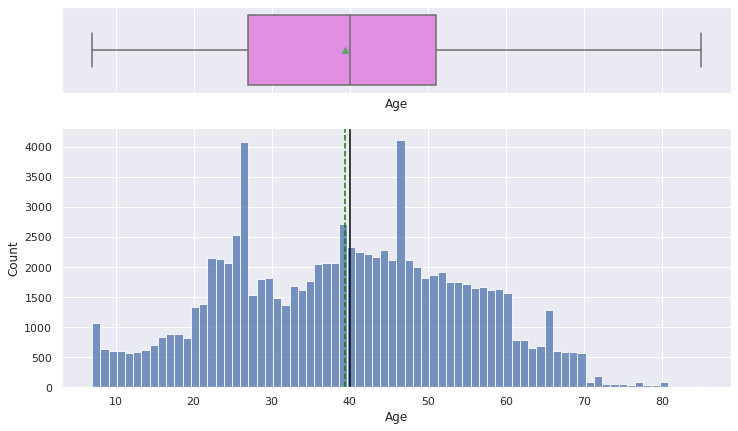

In [ ]:
histogram_boxplot(train_data,'Age')

The area of central tendency is ~39 with max age of 85. The Age is almost evenly distributed. There are no outliers in the Age distribution.

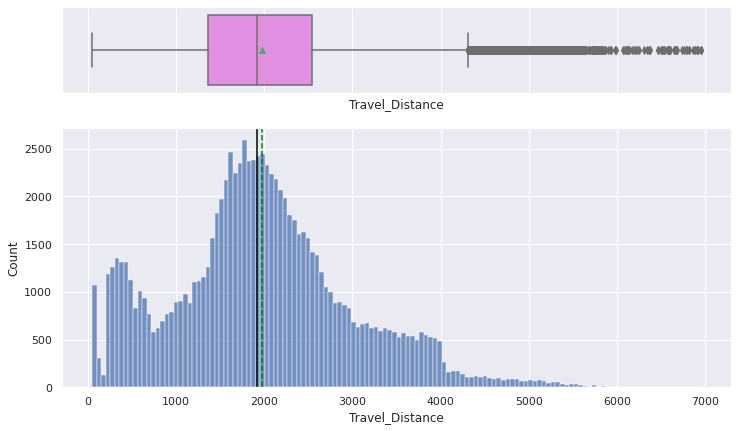

In [ ]:
histogram_boxplot(train_data, 'Travel_Distance')

- Although the travel distance is normally distributed, it is right-skewed which shows outliers that should be investigated expecially the outliers about 6000.

- We can see that the area of central tendency for Travel distance is 1923, despite a maximum value of over 6000

In [ ]:
# Function to create labeled barplots for categorical variables


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


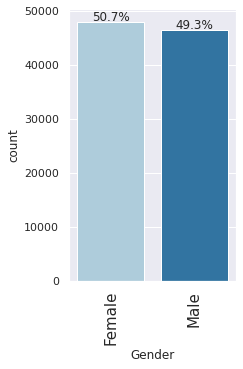

In [ ]:
labeled_barplot(train_data,'Gender')

- The distribution between male and female is rather close, therefore, the data is not gender skewed. This gender balance is very important to create machine learning models that are practically implemented on datasets related to people.

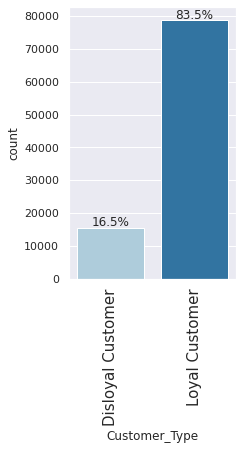

In [ ]:
labeled_barplot(train_data,'Customer_Type')

- There are more loyal customers than disloyal customers. 
- About 16.5% of the travellers are disployal. This travellers can be converted to loyal customers by improving some of the services

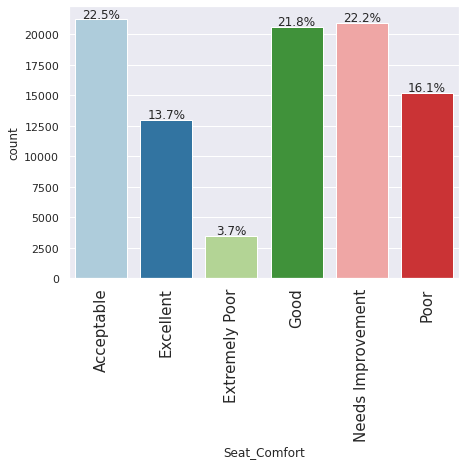

In [ ]:
labeled_barplot(train_data, 'Seat_Comfort')

Seat comfort is relatively good. There is about 22.2% seat that requires improvement. These can be converted to good, acceptable or excellent seats, thereby inceasing the comfortability of the seats.

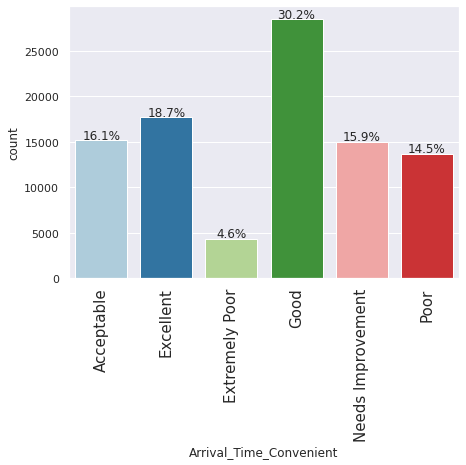

In [ ]:
labeled_barplot(train_data,'Arrival_Time_Convenient')

- The convenience of arrival time requires improvement to increase the % of acceptable/good/excellent arrival time

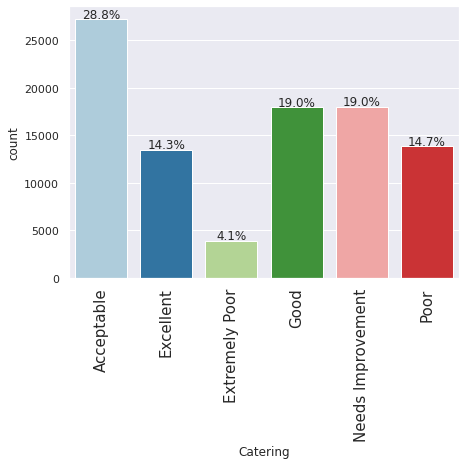

In [ ]:
labeled_barplot(train_data,'Catering')

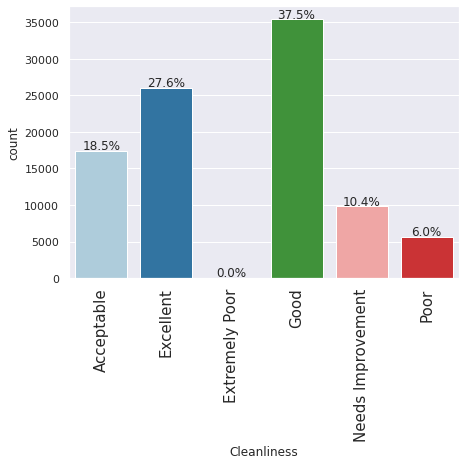

In [ ]:
labeled_barplot(train_data, 'Cleanliness')

- The train the considerably clean.

- Creating a pie chart for the target variable

1    51593
0    42786
Name: Overall_Experience, dtype: int64


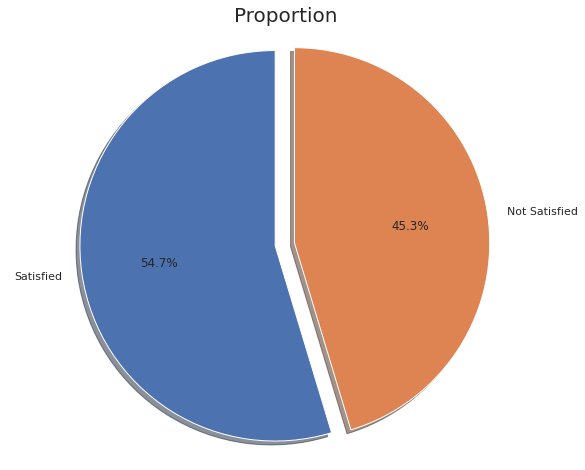

In [ ]:
print(train_data['Overall_Experience'].value_counts())
labels = 'Satisfied', 'Not Satisfied'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [train_data.Overall_Experience[train_data['Overall_Experience']==1].count(),train_data.Overall_Experience[train_data['Overall_Experience']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()


* This pie chart shows that the actual distribution of classes is itself balanced for the target variable.
* 45% of the travellers are not satisfied.

Hence, this dataset and problem statement represent an example of balanced Classification.

### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()

In [ ]:
train_data['Type_Travel'] = labelencoder_RE.fit_transform(train_data['Type_Travel'])

In [ ]:
train_data['Customer_Type'] = labelencoder_RE.fit_transform(train_data['Customer_Type'])
train_data['Arrival_Time_Convenient'] = labelencoder_RE.fit_transform(train_data['Arrival_Time_Convenient'])
train_data['Catering'] = labelencoder_RE.fit_transform(train_data['Catering'])
train_data['Onboard_Service'] = labelencoder_RE.fit_transform(train_data['Onboard_Service'])
train_data['Baggage_Handling'] = labelencoder_RE.fit_transform(train_data['Baggage_Handling'])
train_data['Online_Support'] = labelencoder_RE.fit_transform(train_data['Online_Support'])
train_data['Legroom'] = labelencoder_RE.fit_transform(train_data['Legroom'])
train_data['CheckIn_Service'] = labelencoder_RE.fit_transform(train_data['CheckIn_Service'])
train_data['Gender'] = labelencoder_RE.fit_transform(train_data['Gender'])
train_data['Ease_of_Online_Booking'] = labelencoder_RE.fit_transform(train_data['Ease_of_Online_Booking'])
train_data['Seat_Comfort'] = labelencoder_RE.fit_transform(train_data['Seat_Comfort'])
train_data['Platform_Location'] = labelencoder_RE.fit_transform(train_data['Platform_Location'])
train_data['Onboard_Wifi_Service'] = labelencoder_RE.fit_transform(train_data['Onboard_Wifi_Service'])
train_data['Onboard_Entertainment'] = labelencoder_RE.fit_transform(train_data['Onboard_Entertainment'])
train_data['Cleanliness'] = labelencoder_RE.fit_transform(train_data['Cleanliness'])
train_data['Online_Boarding'] = labelencoder_RE.fit_transform(train_data['Online_Boarding'])

In [ ]:
train_data['Travel_Class'] = labelencoder_RE.fit_transform(train_data['Travel_Class'])

In [ ]:
train_data['Seat_Class'] = labelencoder_RE.fit_transform(train_data['Seat_Class'])

               

Using target encoder

### Encoding the test data

In [ ]:
test_data['Type_Travel'] = labelencoder_RE.fit_transform(test_data['Type_Travel'])
test_data['Customer_Type'] = labelencoder_RE.fit_transform(test_data['Customer_Type'])
test_data['Arrival_Time_Convenient'] = labelencoder_RE.fit_transform(test_data['Arrival_Time_Convenient'])
test_data['Catering'] = labelencoder_RE.fit_transform(test_data['Catering'])
test_data['Onboard_Service'] = labelencoder_RE.fit_transform(test_data['Onboard_Service'])
test_data['Baggage_Handling'] = labelencoder_RE.fit_transform(test_data['Baggage_Handling'])
test_data['Online_Support'] = labelencoder_RE.fit_transform(test_data['Online_Support'])
test_data['Legroom'] = labelencoder_RE.fit_transform(test_data['Legroom'])
test_data['CheckIn_Service'] = labelencoder_RE.fit_transform(test_data['CheckIn_Service'])
test_data['Gender'] = labelencoder_RE.fit_transform(test_data['Gender'])
test_data['Ease_of_Online_Booking'] = labelencoder_RE.fit_transform(test_data['Ease_of_Online_Booking'])
test_data['Seat_Comfort'] = labelencoder_RE.fit_transform(test_data['Seat_Comfort'])
test_data['Platform_Location'] = labelencoder_RE.fit_transform(test_data['Platform_Location'])
test_data['Onboard_Wifi_Service'] = labelencoder_RE.fit_transform(test_data['Onboard_Wifi_Service'])
test_data['Onboard_Entertainment'] = labelencoder_RE.fit_transform(test_data['Onboard_Entertainment'])
test_data['Cleanliness'] = labelencoder_RE.fit_transform(test_data['Cleanliness'])
test_data['Online_Boarding'] = labelencoder_RE.fit_transform(test_data['Online_Boarding'])
test_data['Travel_Class'] = labelencoder_RE.fit_transform(test_data['Travel_Class'])
test_data['Seat_Class'] = labelencoder_RE.fit_transform(test_data['Seat_Class'])

In [ ]:
train_data.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,1,52.0,0,0,272.0,0.0,5.0,0,4,...,3,4,0,4,4,0,3,3,4,5
1,1,1,48.0,1,1,2200.0,9.0,0.0,0,5,...,3,5,3,3,1,4,4,4,3,3
2,0,1,43.0,0,0,1061.0,77.0,119.0,1,4,...,4,3,1,1,1,1,1,3,1,1
3,0,1,44.0,0,0,780.0,13.0,18.0,0,0,...,0,4,0,0,0,0,0,3,0,0
4,0,1,50.0,0,0,1981.0,0.0,0.0,1,0,...,4,3,1,3,3,3,2,3,3,3


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  int64  
 1   Customer_Type            94379 non-null  int64  
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  int64  
 4   Travel_Class             94379 non-null  int64  
 5   Travel_Distance          94379 non-null  float64
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94379 non-null  int64  
 10  Seat_Class               94379 non-null  int64  
 11  Arrival_Time_Convenient  94379 non-null  int64  
 12  Catering                 94379 non-null  int64  
 13  Platform_Location        94379 non-null  int64  
 14  Onboard_Wifi_Service  

### Split the train data with train_test_split into train and test data

In [ ]:
X = train_data.drop(['Overall_Experience'],axis = 1)
y = train_data['Overall_Experience']

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

In [ ]:
X_train, X_test,  y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [ ]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66065, 23)
(28314, 23)
(66065,)
(28314,)


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a traveller is satisfied with their travel experience but in reality, the customer is not satisfied. i.e predicting a 1 but actual is 0 (False Positive)
2. Predicting a traveller is not satisfied with their travel experience but in reality, the customer is satisfied. i.e predicting a 0 but actual is 1 (False negative)

#### **Which case is more important?** 

Both the cases are important as:



* If we predict that a traveller is not satisfied but he is actually satisfied, the company will lose resources utilized to ensure the traveller is satified.

* If we predict that a traveller is satified but he is not actually satified,  the company might ignore the client and might not be able to provide satisfactory services to the customer by assuming that the traveller is satisfied. This might damage brand reputation and equity. 



#### **How to reduce the losses?**

* Shinkansen Bullet Train would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

Creating a function for confusion matrix

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,7),
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
       #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    if title:
        plt.title(title)

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

#### **Building a Logistic Regression model**

In [ ]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train = lg.predict(X_train)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     30178
           1       0.70      0.74      0.72     35887

    accuracy                           0.68     66065
   macro avg       0.68      0.68      0.68     66065
weighted avg       0.68      0.68      0.68     66065



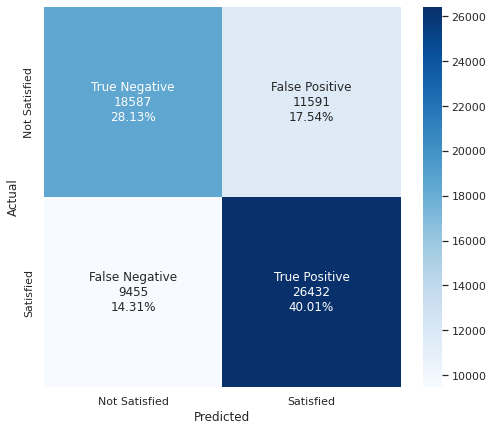

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
print(classification_report(y_train, y_pred_train))
cm=confusion_matrix(y_train, y_pred_train)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations**
- In classification, the class of interest is considered the positive class. identifying the traveller is statisfied although he is not satisfied (False Positive)
- The accuracy on the train data is 68%
- The precision for the train data is 0.70 and F1 score is 0.72. 
- Let us see if this can be increased significantly with optimal threshold

#### Let's check the performance on the test set

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     12608
           1       0.71      0.74      0.72     15706

    accuracy                           0.69     28314
   macro avg       0.68      0.68      0.68     28314
weighted avg       0.68      0.69      0.68     28314



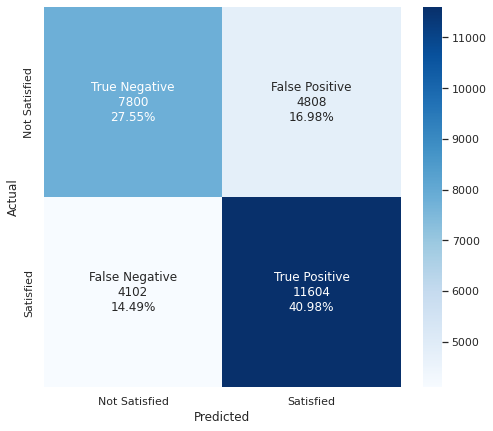

In [ ]:
print(classification_report(y_test, y_pred_test))
cm=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- There is no significant increase on the precision and accuracy. Optimizing the threhold might improve the model performance

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**

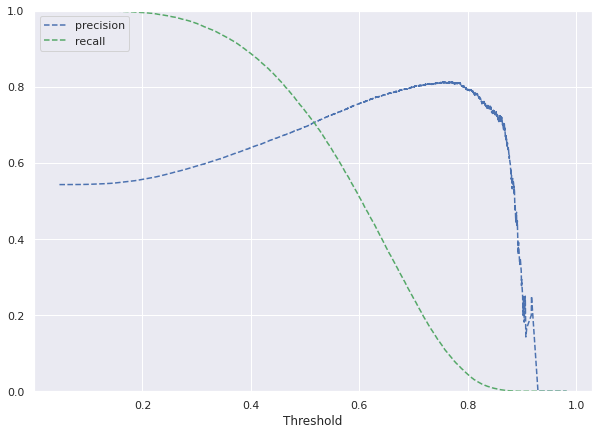

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation**
- Precision and recall are balanced for a threshold of about ~0.55

In [ ]:
# Setting the optimal threshold
optimal_threshold = 0.55

#### **Checking the performance of the model on train and test data using the optimal threshold.**

In [ ]:
# Creating confusion matrix
y_pred_train_th = lg.predict_proba(X_train)

              precision    recall  f1-score   support

           0       0.62      0.72      0.67     30178
           1       0.73      0.63      0.68     35887

    accuracy                           0.67     66065
   macro avg       0.67      0.68      0.67     66065
weighted avg       0.68      0.67      0.67     66065



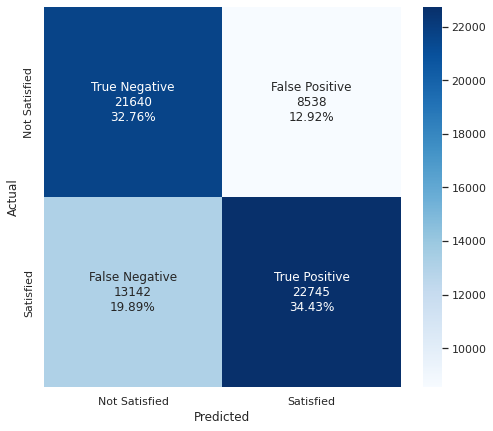

In [ ]:
print(classification_report(y_train,y_pred_train_th[:,1]>optimal_threshold))
cm=confusion_matrix(y_train, y_pred_train_th[:,1]>optimal_threshold)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Although thr precision increased from 0.70 to 0.73, the accuracy decreased from 0.68 to 0.67 and F1 score dropped from 0.72 to 0.68. Let us see the effect of optimal threshold on the test data

In [ ]:
y_pred_test_th = lg.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.61      0.71      0.66     12608
           1       0.73      0.63      0.68     15706

    accuracy                           0.67     28314
   macro avg       0.67      0.67      0.67     28314
weighted avg       0.68      0.67      0.67     28314



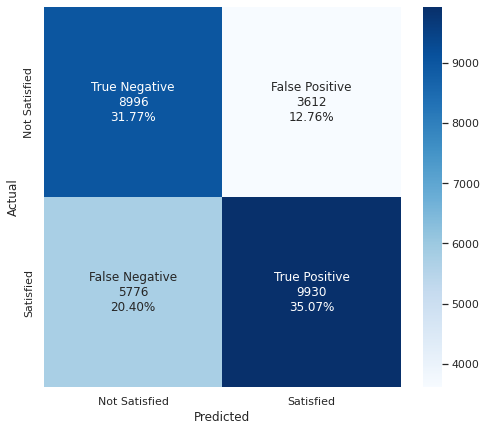

In [ ]:
print(classification_report(y_test,y_pred_test_th[:,1]>optimal_threshold))
cm=confusion_matrix(y_test, y_pred_test_th[:,1]>optimal_threshold)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

There is no change on the model for the test data with the optimal threhold


### **Building the Support Vector Machine Models**

To accelerate SVM training, let's scale the data for support vector machines.

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Building a Support Vector Machine model using a linear kernel (with scaled data)**

In [ ]:
svm = SVC(kernel='linear',probability=True) # Linear kernel or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

#### **Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     30178
           1       0.76      0.83      0.79     35887

    accuracy                           0.76     66065
   macro avg       0.76      0.75      0.76     66065
weighted avg       0.76      0.76      0.76     66065



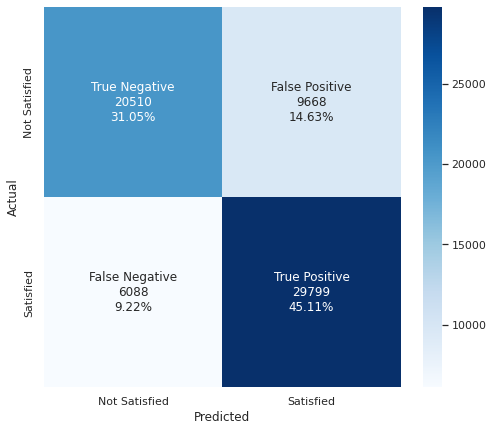

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)
print(classification_report(y_train,y_pred_train_svm))
cm=confusion_matrix(y_train, y_pred_train_svm)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The model improved significantly on the train data with SVM model with Linear kernel compared with logistic regression. The accuracy od SVM with linear kernel is 0.76 as compared with logistic regression accuracy of 0.68

Check model performance on test data

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     12608
           1       0.76      0.83      0.79     15706

    accuracy                           0.76     28314
   macro avg       0.76      0.75      0.75     28314
weighted avg       0.76      0.76      0.76     28314



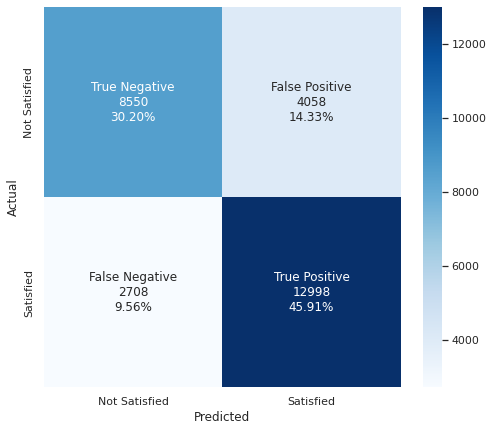

In [ ]:
y_pred_test_svm = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test_svm))
cm=confusion_matrix(y_test, y_pred_test_svm)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The accuracy of SVM with linear kernel on the test data is also 0.76, same as on the train data.
Let us optimal the threshold to see if the F1 score and the accuracy will improve

#### **Obtaining the optimal threshold for the model using the Precision-Recall Curve.**


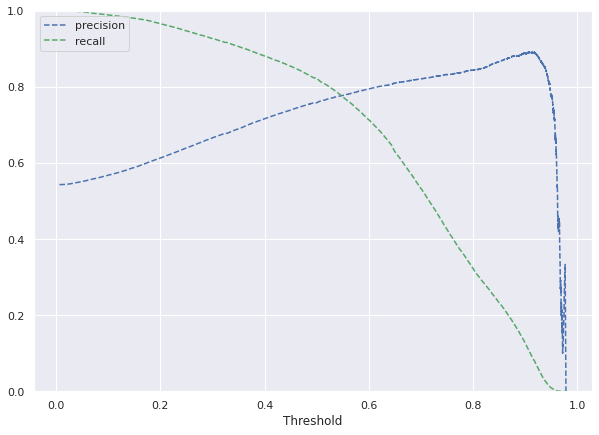

In [ ]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train,y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation**
- Precision and recall are balanced for a threshold of about ~0.57


In [ ]:
optimal_threshold_svm= 0.57

#### **Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     30178
           1       0.78      0.77      0.78     35887

    accuracy                           0.76     66065
   macro avg       0.76      0.76      0.76     66065
weighted avg       0.76      0.76      0.76     66065



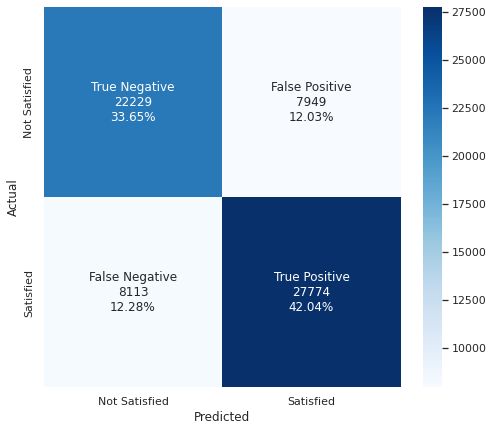

In [ ]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
print(classification_report(y_train,y_pred_train_svm[:,1]>optimal_threshold))
cm=confusion_matrix(y_train, y_pred_train_svm[:,1]>optimal_threshold)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- There is no significant change in the model with optimal threhold of 0.57 as compared with SVM with linear kernel. The accuracy is 0.76

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     12608
           1       0.79      0.77      0.78     15706

    accuracy                           0.76     28314
   macro avg       0.75      0.75      0.75     28314
weighted avg       0.76      0.76      0.76     28314



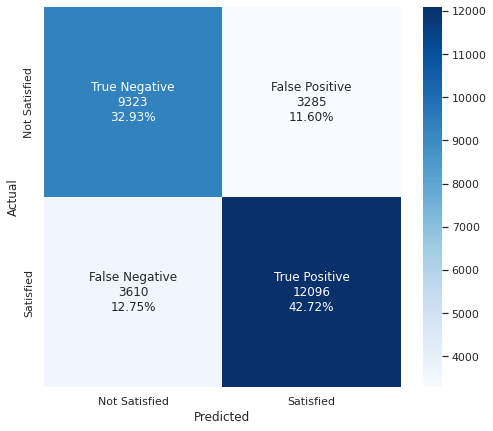

In [ ]:
y_pred_test = model.predict_proba(X_test_scaled)
print(classification_report(y_test,y_pred_test[:,1]>optimal_threshold))
cm=confusion_matrix(y_test, y_pred_test[:,1]>optimal_threshold)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observation**
- There is no significant change in the model with optimal threhold of 0.57 as compared with SVM with linear kernel. The accuracy is 0.76

#### **Building a Support Vector Machines model using an RBF kernel**

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     30178
           1       0.91      0.94      0.93     35887

    accuracy                           0.92     66065
   macro avg       0.92      0.92      0.92     66065
weighted avg       0.92      0.92      0.92     66065



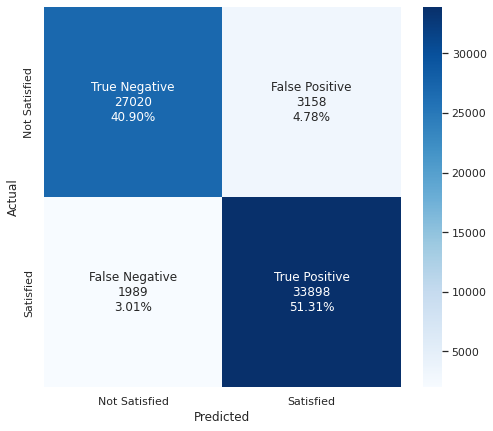

In [ ]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
print(classification_report(y_train,y_pred_train_svm))
cm=confusion_matrix(y_train, y_pred_train_svm)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations**
- With the SVM model with rbf kernel, te model improved significantly with the F1 score for class 1 is about 93% on train data and accuracy of 92%


##### **Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     12608
           1       0.91      0.94      0.92     15706

    accuracy                           0.92     28314
   macro avg       0.92      0.91      0.91     28314
weighted avg       0.92      0.92      0.91     28314



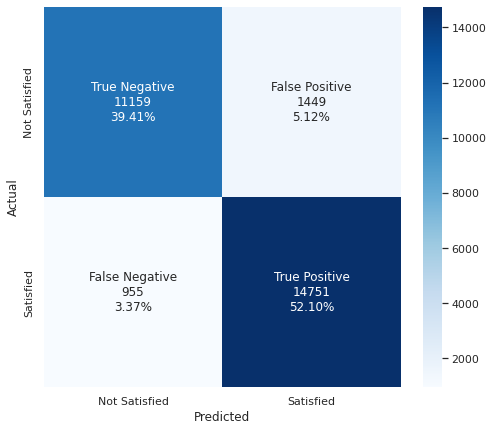

In [ ]:
y_pred_test = svm_rbf.predict(X_test_scaled)

print(classification_report(y_test,y_pred_test))
cm=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The SVM model with a non-linear (rbf) kernel performed well on the test data with accuracy of 92% anf F1 score of 92%

#### **Building a Decision Tree Model**

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30178
           1       1.00      1.00      1.00     35887

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



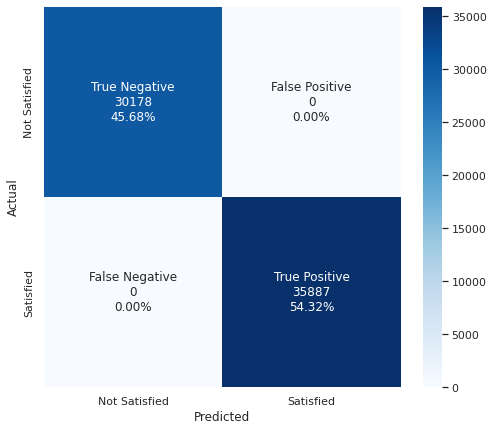

In [ ]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
print(classification_report(y_train,pred_train_dt))
cm=confusion_matrix(y_train, pred_train_dt)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


**Observations**
- The Decision Tree model performance at 100% with 100% accuracy and 100% on all metrics
- The model performance is great on the training data.
- Let us test the performance on test data

#### **Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12608
           1       0.93      0.93      0.93     15706

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



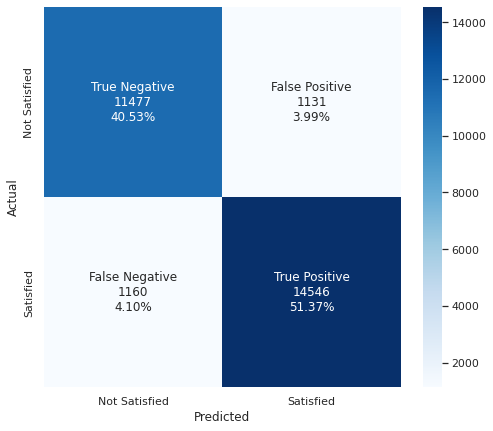

In [ ]:
pred_test_dt = model_dt.predict(X_test)
print(classification_report(y_test,pred_test_dt))
cm=confusion_matrix(y_test, pred_test_dt)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The model performed well on the test data, although the metrics dropped from 100% to 92% on test data.

 #### **Performing hyperparameter tuning for the decision tree model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


In [ ]:
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Checking the performance of the model on the train and test data using the tuned model**

##### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     30178
           1       0.87      0.92      0.90     35887

    accuracy                           0.89     66065
   macro avg       0.89      0.88      0.88     66065
weighted avg       0.89      0.89      0.88     66065



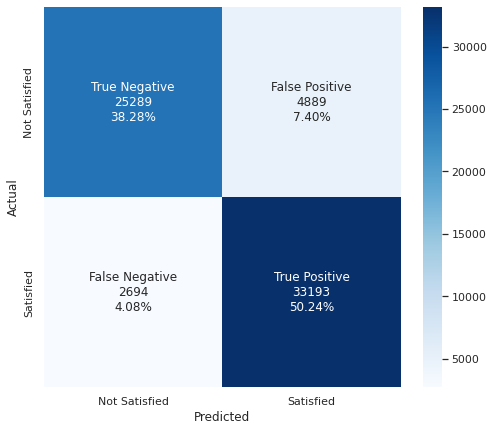

In [ ]:

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
print(classification_report(y_train,dt_tuned))
cm=confusion_matrix(y_train, dt_tuned)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations**
- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- With an accuracy score of 89%, the tuning of the parameters has ensured the model is not overfitting.

##### Checking performance on the test data set

              precision    recall  f1-score   support

           0       0.90      0.83      0.87     12608
           1       0.87      0.93      0.90     15706

    accuracy                           0.88     28314
   macro avg       0.89      0.88      0.88     28314
weighted avg       0.89      0.88      0.88     28314



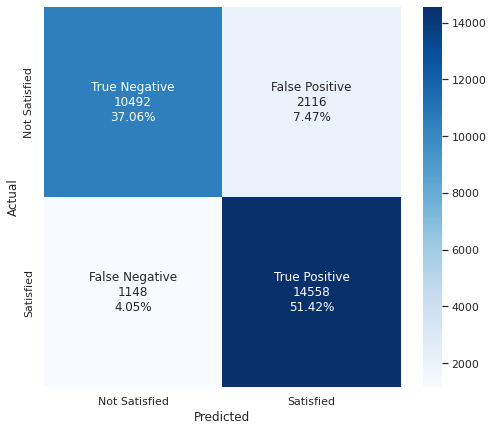

In [ ]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
print(classification_report(y_test,y_pred_tuned))
cm=confusion_matrix(y_test, y_pred_tuned)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

On the test data, accuracy is 88% with F1 score of 90%

#### **Visualizing the Decision Tree**

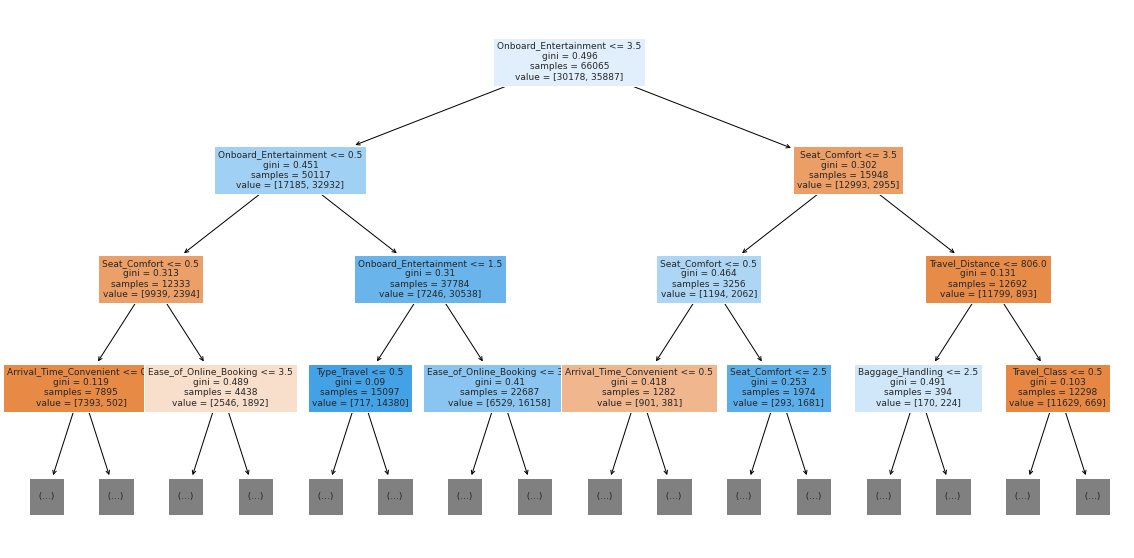

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Some important features based on the tuned decision tree**

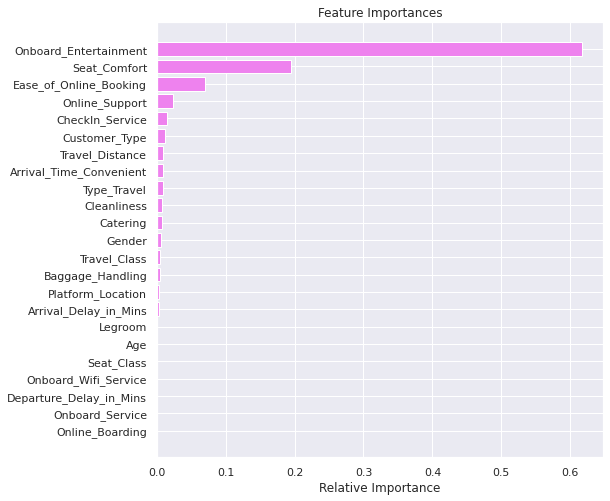

In [ ]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*  After tuning the model, we found out about 4 of the features having higher relative importance.

* We observe that the 4 most important features that describes the traveller's satisfaction are:
    * Onboard Entertainment
    * Seat Comfort
    - Ease of online Booking
    - online Support


#### **Building a Random Forest Model**

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### **To check the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30178
           1       1.00      1.00      1.00     35887

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



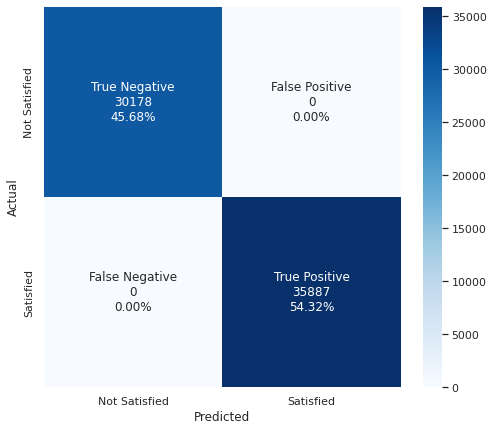

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)
print(classification_report(y_train,y_pred_train_rf))
cm=confusion_matrix(y_train, y_pred_train_rf)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observation**

- All the samples on the training dataset were correctly classified with a 100% accuracy
- The model performed well on the training data

Checking the performance of the model on test data

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12608
           1       0.95      0.95      0.95     15706

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



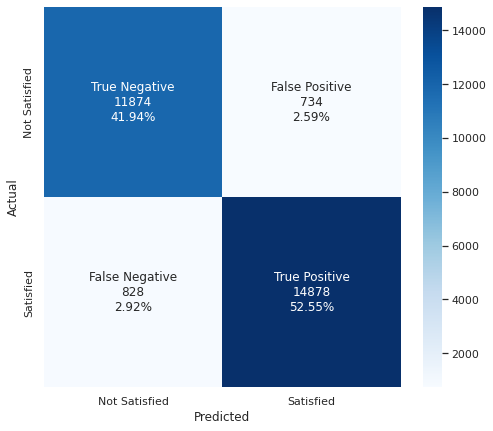

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)
print(classification_report(y_test,y_pred_test_rf))
cm=confusion_matrix(y_test, y_pred_test_rf)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observation**
- The model seem to be overfitting the training data as the model performance reduced on the test data as compared with training data.
- Although the model is overfitting, with a F1 score of 0.95 on class 1, it has a better performance compared with Logistic Regression and SVM.
- The parameters of the random forest should be tuned to reduce overfitting.

Let's check the feature importance of the Random Forest

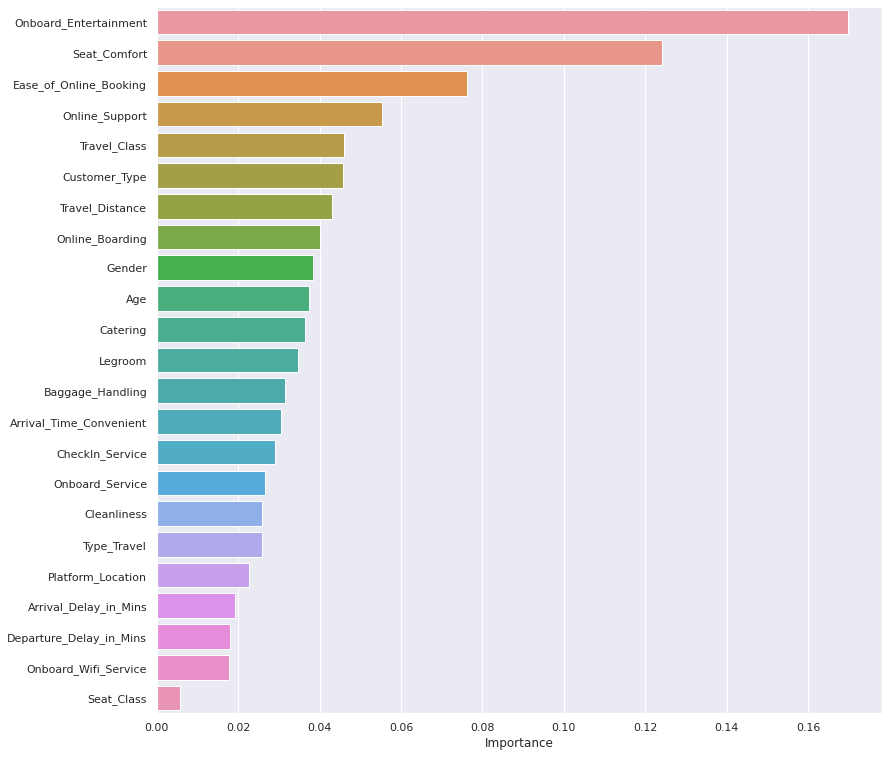

In [ ]:

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances,index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

##### **Observation**

- The Random Forest further verifies the results from the decision tree, that the 4 most important features are OnBoard Entertainment, Seat Comfort, Ease of online Booking and Online Support
- OnBoard Entertainment is most important feature. If the OnBoard Entertainment is great, the travellers are mosre likely to be satisfied.
- Seat comfortability is also another very important feature to improve traveller's satisfaction
- The model **is not bias** as it takes into consideration more important features compared with the decision tree model

Test the models on test data

Random Forest

In [ ]:
test = test_data.copy()

In [ ]:
test_data.drop('ID', axis = 1, inplace=True)

In [ ]:
y_pred_test = rf_estimator.predict(test_data)

In [ ]:
rf_test = pd.DataFrame(y_pred_test, columns = ['Overall_Experience'])

In [ ]:
rf_test.head()

,Overall_Experience
0,1
1,1
2,1
3,0
4,1


In [ ]:
rf_ID = pd.DataFrame(test['ID'])

In [ ]:
rf_submit = pd.concat([rf_ID,rf_test], axis =1)

In [ ]:
rf_submit.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
rf_submit.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission_rf.csv', index = False)

SVF on test data

In [ ]:
svc_pred_test = svm_rbf.predict(test_data)

In [ ]:
svc_test = pd.DataFrame(svc_pred_test, columns = ['Overall_Experience'])

In [ ]:
svc_submit = pd.concat([rf_ID,svc_test], axis =1)

In [ ]:
svc_submit.head()

,ID,Overall_Experience
0,99900001,0
1,99900002,0
2,99900003,0
3,99900004,0
4,99900005,0


In [ ]:
svc_submit.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission_svc.csv', index = False)

### Decision Tree

In [ ]:
dt_test = estimator.predict(test_data)

In [ ]:
dt_df = pd.DataFrame(dt_test, columns = ['Overall_Experience'])

In [ ]:
dt_submit = pd.concat([rf_ID,dt_df], axis =1)

In [ ]:
dt_submit.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
dt_submit.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission_dt.csv', index = False)

 #### **Performing hyperparameter tuning for the random forest model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=75, min_samples_split=10,
                       random_state=1)

#### **Checking the performance of the model on the train and test data using the tuned model**

              precision    recall  f1-score   support

           0       0.93      0.84      0.89     30178
           1       0.88      0.95      0.91     35887

    accuracy                           0.90     66065
   macro avg       0.91      0.90      0.90     66065
weighted avg       0.90      0.90      0.90     66065



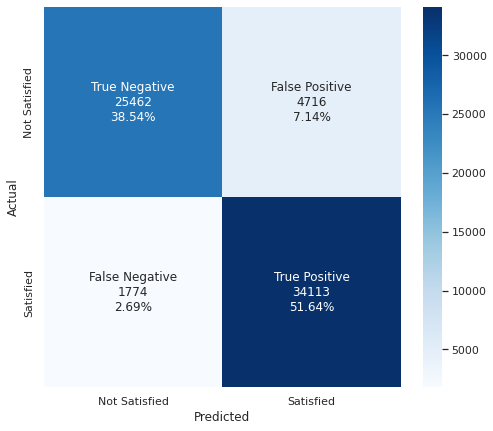

In [ ]:

# Checking performance on the training dataset
rf_tuned = rf_estimator.predict(X_train)
print(classification_report(y_train,rf_tuned))
cm=confusion_matrix(y_train, rf_tuned)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     12608
           1       0.88      0.95      0.91     15706

    accuracy                           0.90     28314
   macro avg       0.91      0.89      0.90     28314
weighted avg       0.90      0.90      0.90     28314



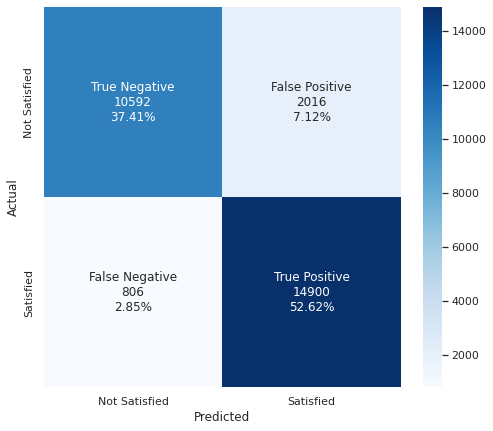

In [ ]:
# Checking performance on the test dataset
y_pred_rf_tuned = rf_estimator.predict(X_test)
print(classification_report(y_test,y_pred_rf_tuned))
cm=confusion_matrix(y_test, y_pred_rf_tuned)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
rf_tuned_test = rf_estimator.predict(test_data)

In [ ]:
rf_tuned_test = pd.DataFrame(rf_tuned_test, columns = ['Overall_Experience'])

In [ ]:
rf_submit = pd.concat([rf_ID,rf_tuned_test], axis =1)

In [ ]:
rf_submit.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,0
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
rf_submit.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission_rf_tuned.csv', index = False)